# Utilisation des réseaux RBF (Radial basis function) pour la prédiction de la consommation de carburant en miles par gallon

Importez les bibliothèques nécessaires : Utilisez les commandes suivantes pour importer les bibliothèques nécessaires, comme pandas et numpy :

In [2]:
import pandas as pd
import numpy as np


Téléchargez les données : Utilisez la commande pandas 'read_csv' pour télécharger les données à partir du lien fourni (https://archive.ics.uci.edu/ml/datasets/auto+mpg) et les stocker dans un dataframe :

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
data = pd.read_csv(url, delim_whitespace=True, header=None,
                      names=['mpg', 'cylinders', 'displacement', 'horsepower',
                             'weight', 'acceleration', 'model_year', 'origin', 'name'])


Analysez les données : Utilisez les commandes de pandas pour afficher un aperçu des données et identifier les colonnes qui seront utilisées en tant qu'entrées et sorties pour le modèle :

In [4]:
data.head()
data.describe()


,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Nettoyer les données : Utilisez les commandes de pandas pour nettoyer les données en supprimant les lignes avec des valeurs manquantes ou aberrantes :

In [5]:
data = data.dropna()
data = data[data.horsepower != '?']


Préparez les données : Utilisez les commandes numpy pour crer les tableaux numpy qui contiendront les entrées et les sorties pour l'entraînement du modèle :

In [6]:
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']].values
y = data[['mpg']].values


Normalisez les données : Utilisez les commandes de scikit-learn pour normaliser les données d'entrée pour que les valeurs se situent entre 0 et 1 :

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


Séparez les données en ensemble d'entraînement et de test : Utilisez les commandes de scikit-learn pour séparer les données en un ensemble d'entraînement (généralement 80%) et un ensemble de test (20%) :

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Importer la bibliothèque : Utilisez les commandes suivantes pour importer la bibliothèque nécessaire pour entraîner un modèle RBF, comme scikit-learn :

In [9]:
from sklearn.neural_network import MLPRegressor


Initialiser le modèle : Utilisez la fonction 'MLPRegressor' pour initialiser un objet de modèle :

In [10]:
rbf_model = MLPRegressor(hidden_layer_sizes=(5,5), activation='logistic', solver='lbfgs',max_iter=1000)


Entraîner le modèle : Utilisez la méthode 'fit' de l'objet de modèle pour entraîner le modèle en utilisant les données d'entraînement :


Evaluer la performance : Utilisez la méthode 'predict' de l'objet de modèle pour faire des prédictions sur les données de test et utilisez des métriques de performance comme le coefficient de détermination (R²) pour évaluer la performance du modèle:

In [22]:
rbf_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='logistic', hidden_layer_sizes=(5, 5), max_iter=2000,
             solver='lbfgs')

In [23]:
y_pred = rbf_model.predict(X_test)
from sklearn.metrics import r2_score
print("R2: ", r2_score(y_test, y_pred))


R2:  0.7521260037116597


Prédire les résultats : Utilisez la méthode 'predict' de l'objet de modèle entraîné pour faire des prévisions sur les données de test.

In [25]:
y_pred = rbf_model.predict(X_test)


Utiliser des métriques de performance : Utilisez des métriques de performance comme le coefficient de détermination (R²) pour évaluer la performance du modèle.

In [26]:
from sklearn.metrics import r2_score
print("R2: ", r2_score(y_test, y_pred))


R2:  0.7521260037116597


Utiliser des graphiques: Utilisez des graphiques pour visualiser les prédictions du modèle et les résultats réels.

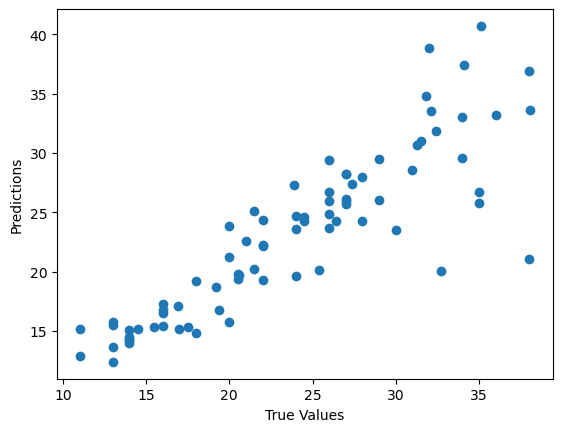

In [27]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


Utiliser la méthode 'predict': Utilisez la méthode 'predict' de l'objet de modèle entraîné pour faire des prévisions sur les données de test.

In [29]:
new_data = [[5, 170, 85, 5, 170, 85, 5]] 
predictions = rbf_model.predict(new_data)
print("Predicted MPG: ", predictions)


Predicted MPG:  [8.23944323]
